## Insights Into Impact of US Elections on Stock Market 

##### Description: This code shows the stock market returns during a US election

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [16]:
# Load the SP500 data
sp500 = yf.download("^GSPC", start="1952-01-02", end="2023-12-30")
sp500 = sp500.droplevel(level=1, axis=1)
# Show the data
sp500

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1952-01-02 00:00:00+00:00,23.799999,23.799999,23.799999,23.799999,23.799999,1070000
1952-01-03 00:00:00+00:00,23.879999,23.879999,23.879999,23.879999,23.879999,1220000
1952-01-04 00:00:00+00:00,23.920000,23.920000,23.920000,23.920000,23.920000,1480000
1952-01-07 00:00:00+00:00,23.910000,23.910000,23.910000,23.910000,23.910000,1540000
1952-01-08 00:00:00+00:00,23.820000,23.820000,23.820000,23.820000,23.820000,1390000
...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,4754.629883,4754.629883,4772.939941,4736.770020,4753.919922,3046770000
2023-12-26 00:00:00+00:00,4774.750000,4774.750000,4784.720215,4758.450195,4758.859863,2513910000
2023-12-27 00:00:00+00:00,4781.580078,4781.580078,4785.390137,4768.899902,4773.450195,2748450000


In [17]:
# Calculate the annual returns
sp500["Year"] = sp500.index.year
sp500["Annual Return"] = sp500["Adj Close"].pct_change(periods=252)

In [18]:
# Define the US election years 
election_years = {1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020, 2024}

In [20]:
# Categorize the years
sp500["Election Year"] = sp500["Year"].apply(lambda x: "Election year" if x in election_years else "Non Election Year")

In [21]:
# Group by Election year and calculate the average returns
average_returns = sp500.groupby("Election Year")["Annual Return"].mean()

In [22]:
print("Average S&P500 Returns:")
print(average_returns)

Average S&P500 Returns:
Election Year
Election year        0.082784
Non Election Year    0.089665
Name: Annual Return, dtype: float64


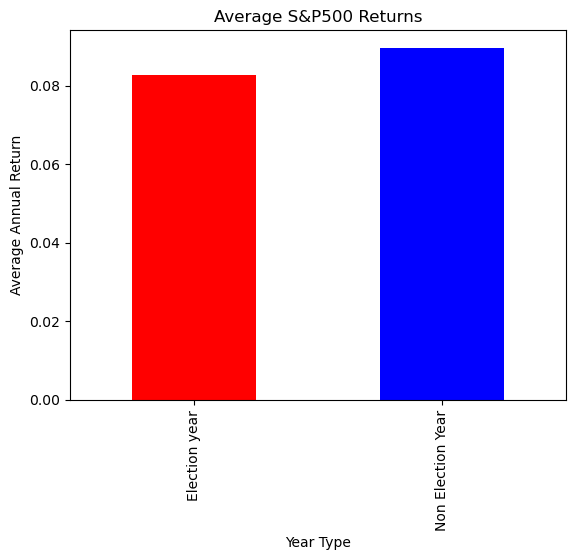

In [24]:
# Visualize the results 
average_returns.plot(kind="bar", title="Average S&P500 Returns", color=["red", "blue"])
plt.xlabel("Year Type")
plt.ylabel("Average Annual Return")
plt.show()